# Summarizing land cover statistics for Census Block Groups

## Libraries
1. pandas - A python data analysis library. [pandas website](http://pandas.pydata.org/)
2. geopandas - library for working with spatial data in Python. Extends pandas. [Geopandas on Github](https://github.com/geopandas/geopandas)
3. rasterstats - library for quickly summarizing raster datasets based on vector intersections [rasterstats on Github](https://github.com/perrygeo/python-rasterstats)
4. mplleaflet - library for quickly displaying matplotlib-based plots on a leafletJS tiled web map. [mplleaflet on Github](https://github.com/jwass/mplleaflet)

In [50]:
import pandas as pd
import geopandas as gpd
from rasterstats import zonal_stats
import mplleaflet
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [51]:
import IPython.display as disp
disp.Image(url='https://raw.githubusercontent.com/egoddard/geospatial_colloquium/gh-pages/images/utc.png')

## Step 1 - Load the block groups vector data into a GeoDataFrame

In [55]:
df = gpd.read_file('../data/study_area_blockgroups.geojson')

# Print the first few rows to see what the data look like
df.head()
crs = df.crs

## Step 2 - Plot the block groups

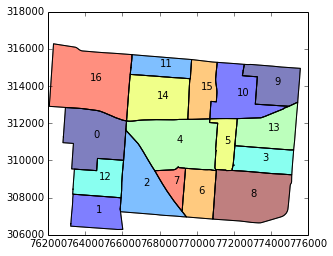

In [56]:
# Plot the block groups on a map so we can see what sort of area we're dealing with
block_groups_plt = df.plot()

# Add each polygon's id as a label so we can differentiate the polygons
for row_index, row in df.iterrows():
    block_groups_plt.annotate(row_index, xy=(row[7].centroid.x, row[7].centroid.y))

In [57]:
# Plot the block groups on a map to get more information about the area
mplleaflet.display(fig=block_groups_plt.figure, crs=crs, tiles="cartodb_positron")

## Step 3 - Calculate the counts of each land cover class within each polygon

In [58]:
stats = zonal_stats(df.geometry, '../data/land_cover_classification.tif', categorical=True)

In [59]:
from IPython.lib.pretty import pprint
pprint(stats)

[{1: 269, 2: 196254, 3: 349029, 4: 4911, 5: 259290, '__fid__': 0},
 {1: 150, 2: 91668, 3: 175596, 4: 898, 5: 155755, '__fid__': 1},
 {1: 529, 2: 202581, 3: 202697, 4: 3203, 5: 334161, '__fid__': 2},
 {1: 615, 2: 143505, 3: 98143, 4: 67, 5: 151768, '__fid__': 3},
 {1: 436, 2: 194610, 3: 217200, 4: 2191, 5: 621799, '__fid__': 4},
 {1: 230, 2: 89213, 3: 81108, 4: 35, 5: 97282, '__fid__': 5},
 {1: 605, 2: 125997, 3: 131237, 4: 178, 5: 144438, '__fid__': 6},
 {1: 18, 2: 43090, 3: 61314, 4: 28, 5: 82616, '__fid__': 7},
 {1: 2041, 2: 349833, 3: 292514, 4: 536, 5: 321951, '__fid__': 8},
 {1: 751, 2: 224830, 3: 87413, 4: 93, 5: 168125, '__fid__': 9},
 {1: 332, 2: 302274, 3: 130955, 4: 288, 5: 208645, '__fid__': 10},
 {1: 199, 2: 155804, 3: 48484, 4: 11, 5: 109736, '__fid__': 11},
 {1: 476, 2: 100630, 3: 133991, 4: 144, 5: 177928, '__fid__': 12},
 {1: 334, 2: 197179, 3: 132367, 4: 413, 5: 217923, '__fid__': 13},
 {1: 1120, 2: 248771, 3: 118418, 4: 1846, 5: 336949, '__fid__': 14},
 {1: 318, 2: 20

## Step 4 - Convert the stats list to a dataframe and clean it up

In [60]:
stats_df = pd.DataFrame(stats)
stats_df.head()

,1,2,3,4,5,__fid__
0,269,196254,349029,4911,259290,0
1,150,91668,175596,898,155755,1
2,529,202581,202697,3203,334161,2
3,615,143505,98143,67,151768,3
4,436,194610,217200,2191,621799,4


In [61]:
# Rename the columns so we know which classes we're working with
stats_df.columns = ['Water', 'Tree Canopy', 'Other Vegetation', 'Bare Soil', 'Impervious', '__fid__']

In [62]:
stats_df.head(5)

,Water,Tree Canopy,Other Vegetation,Bare Soil,Impervious,__fid__
0,269,196254,349029,4911,259290,0
1,150,91668,175596,898,155755,1
2,529,202581,202697,3203,334161,2
3,615,143505,98143,67,151768,3
4,436,194610,217200,2191,621799,4


## Step 5 - Convert the counts to percentages

In [63]:
landcover_types = ['Water', 'Tree Canopy', 'Other Vegetation', 'Bare Soil', 'Impervious']
stats_df['total'] = stats_df[landcover_types].sum(axis=1)
stats_df.head(5)

,Water,Tree Canopy,Other Vegetation,Bare Soil,Impervious,__fid__,total
0,269,196254,349029,4911,259290,0,809753
1,150,91668,175596,898,155755,1,424067
2,529,202581,202697,3203,334161,2,743171
3,615,143505,98143,67,151768,3,394098
4,436,194610,217200,2191,621799,4,1036236


In [65]:
def calculate_percentage(x, landcover, sum_col):
    return (x[landcover] / float(x[sum_col])) * 100

for i in range(len(landcover_types)):
    stats_df[landcover_types[i] + " percent"] = stats_df.apply(calculate_percentage, args=(i,6), axis=1)

In [66]:
stats_df.head()

,Water,Tree Canopy,Other Vegetation,Bare Soil,Impervious,__fid__,total,Water percent,Tree Canopy percent,Other Vegetation percent,Bare Soil percent,Impervious percent
0,269,196254,349029,4911,259290,0,809753,0.033220,24.236279,43.103144,0.606481,32.020876
1,150,91668,175596,898,155755,1,424067,0.035372,21.616396,41.407608,0.211759,36.728866
2,529,202581,202697,3203,334161,2,743171,0.071181,27.259002,27.274611,0.430991,44.964214
3,615,143505,98143,67,151768,3,394098,0.156053,36.413532,24.903197,0.017001,38.510218
4,436,194610,217200,2191,621799,4,1036236,0.042075,18.780471,20.960476,0.211438,60.005539


## Step 5 - Join the land cover stats to the geodata frame

In [67]:
percent_columns = ['Water percent', 'Tree Canopy percent', 'Other Vegetation percent', 
                   'Bare Soil percent', 'Impervious percent']
df = df.join(stats_df[percent_columns])

In [68]:
df.head()

,aland10,awater10,b19013001,blkgrpce10,countyfp10,funcstat10,geoid10,geometry,intptlat10,intptlon10,...,shape_star,shape_stle,statefp10,tractblk,tractce10,Water percent,Tree Canopy percent,Other Vegetation percent,Bare Soil percent,Impervious percent
0,809096,0,15338,2,157,S,471570115002,(POLYGON ((762828.9319091439 311275.3030356467...,+35.1203136,-090.0270934,...,8709459.49646,12759.144726,47,115002,011500,0.033220,24.236279,43.103144,0.606481,32.020876
1,423726,0,19971,4,157,S,471570115004,"(POLYGON ((763230.9143728912 306589.824873805,...",+35.1092648,-090.0260275,...,4561199.05626,8825.934263,47,115004,011500,0.035372,21.616396,41.407608,0.211759,36.728866
2,742582,0,22167,1,157,S,471570115001,(POLYGON ((765885.0544058084 307388.7809530646...,+35.1135317,-090.0177663,...,7993459.36770,13660.833529,47,115001,011500,0.071181,27.259002,27.274611,0.430991,44.964214
3,393777,0,35476,3,157,S,471570063003,(POLYGON ((771910.1394684762 309559.1535808146...,+35.1179294,-089.9964763,...,4238780.13659,9160.812924,47,63003,006300,0.156053,36.413532,24.903197,0.017001,38.510218
4,1035422,0,23864,1,157,S,471570062001,(POLYGON ((766191.9409311414 311678.5656805634...,+35.1199802,-090.0121588,...,11145719.20040,14308.764516,47,62001,006200,0.042075,18.780471,20.960476,0.211438,60.005539


## Step 6 - Plot it

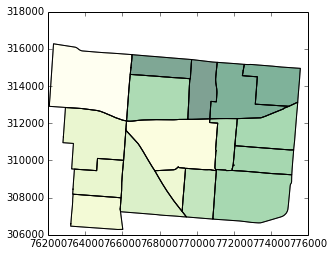

In [70]:
tree_canopy_plot = df.plot(column='Tree Canopy percent', colormap='YlGn')

In [71]:
# Map it
mplleaflet.display(fig=tree_canopy_plot.figure, crs=crs, tiles="cartodb_positron")